In [259]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Data

In [260]:
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/course_data_18_jan_2026/cancer_classification.csv')

In [261]:
df =dataset.copy()

In [262]:
df.shape

(569, 31)

In [263]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#EDA

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [266]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

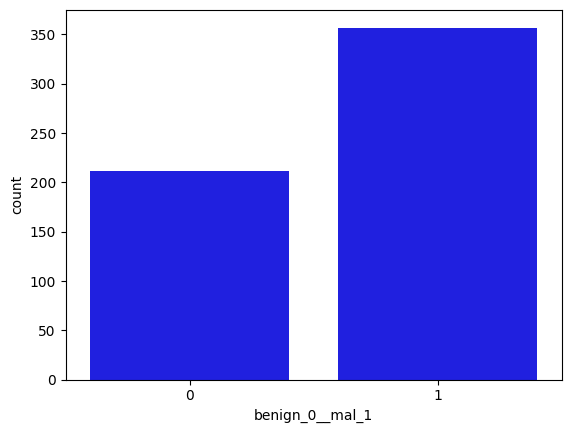

In [267]:
sns.countplot(x= df['benign_0__mal_1'],data=df,color='blue')

<Axes: >

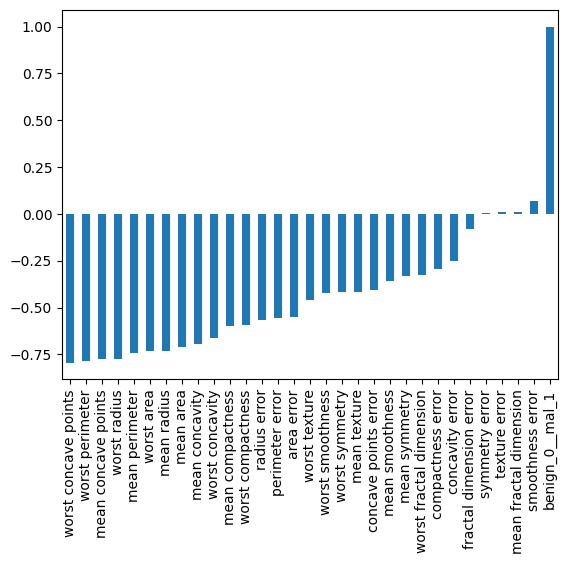

In [268]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

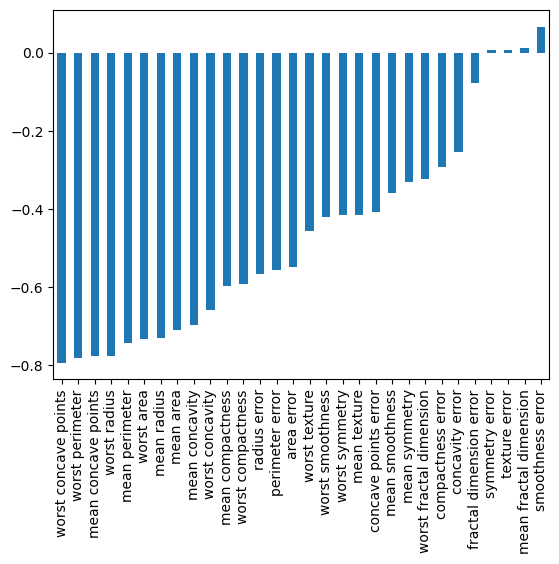

In [269]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

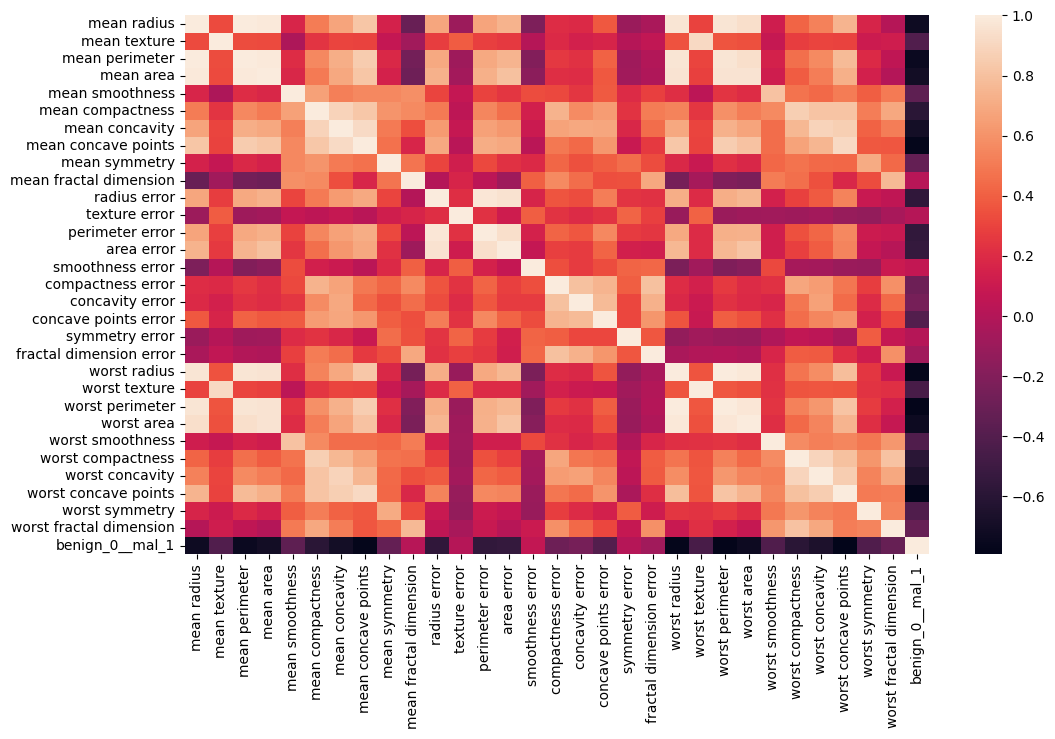

In [270]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),)

In [271]:
X= df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [274]:
from sklearn.preprocessing import MinMaxScaler

In [275]:
scaler= MinMaxScaler()


In [276]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Model

In [277]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [278]:
X_train.shape

(426, 30)

In [279]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#Binary Classification activation sigmoid
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')

In [280]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.6830 - val_loss: 0.6629
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6516 - val_loss: 0.6322
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6178 - val_loss: 0.5956
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5837 - val_loss: 0.5515
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5265 - val_loss: 0.5007
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4910 - val_loss: 0.4518
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4398 - val_loss: 0.4012
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3905 - val_loss: 0.3585
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3548 - val_loss: 0.3205
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3232 - val_loss: 0.2875
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2932 - val_loss: 0.2627
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

In [281]:
losses =pd.DataFrame(model.history.history)

<Axes: >

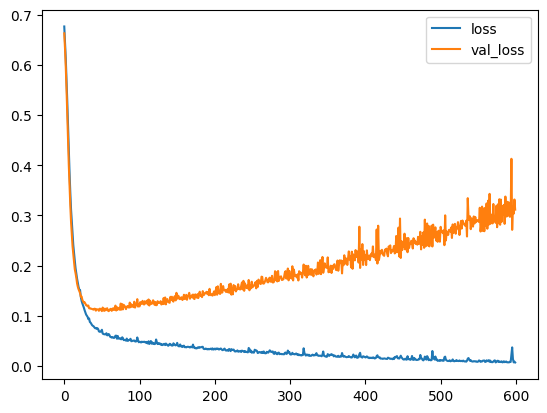

In [282]:
losses.plot()

##EarlyStopping

In [283]:
from tensorflow.keras.callbacks import EarlyStopping

In [284]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#Binary Classification activation sigmoid
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')

In [285]:
early_stop= EarlyStopping(monitor='val_loss',
                          mode='min',  #if metric is loss  if accuracy max
                          verbose=1,
                          patience=25)

In [286]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.6809 - val_loss: 0.6573
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6428 - val_loss: 0.6152
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5957 - val_loss: 0.5604
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5370 - val_loss: 0.5060
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4835 - val_loss: 0.4542
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4251 - val_loss: 0.4040
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3822 - val_loss: 0.3583
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3404 - val_loss: 0.3214
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3093 - val_loss: 0.2790
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2675 - val_loss: 0.2511
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2426 - val_loss: 0.2207
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - l

In [287]:
model_loss= pd.DataFrame(model.history.history)

<Axes: >

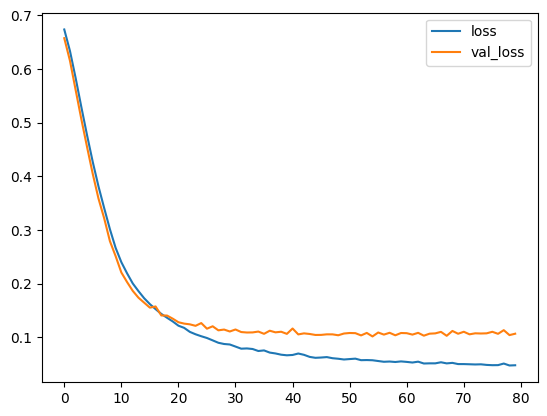

In [288]:
model_loss.plot()

##Dropout layer addition

In [289]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [290]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#Binary Classification activation sigmoid
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')

In [291]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.7115 - val_loss: 0.6780
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6942 - val_loss: 0.6731
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6813 - val_loss: 0.6689
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6751 - val_loss: 0.6613
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6525 - val_loss: 0.6444
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6480 - val_loss: 0.6257
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6476 - val_loss: 0.6127
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6301 - val_loss: 0.5974
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6198 - val_loss: 0.5744
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5954 - val_loss: 0.5522
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5515 - val_loss: 0.5290
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 

In [292]:
model_loss= pd.DataFrame(model.history.history)

<Axes: >

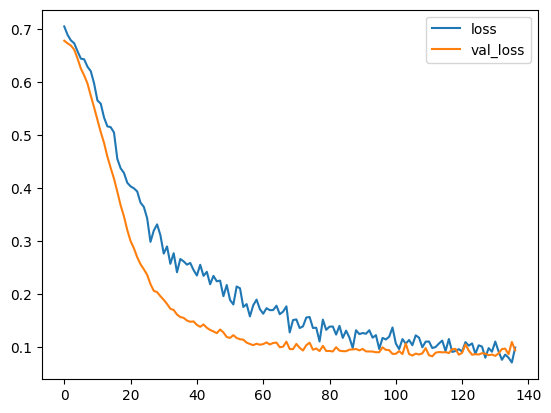

In [293]:
model_loss.plot()

In [294]:
y_pred_probs = model.predict(X_test)
predictions = (y_pred_probs > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [295]:
# y_pred_probs
# predictions

In [296]:
from sklearn.metrics import classification_report,confusion_matrix

In [297]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [298]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


#Project Excercise

In [299]:
!ls /content/drive/MyDrive/Colab\ Notebooks/MachineLearningCourseWithPython/data/course_data_18_jan_2026/

advanced_housing.csv		Frozen_Dessert_Production.csv
african_econ_crises.csv		german_credit_data.csv
bank-additional-full.csv	heart.csv
bank-additional-names.txt	iris.csv
bank.csv			kc_house_data.csv
boxplot.png			LCDataDictionary.xlsx
california_housing_sklearn.csv	lending_club_info.csv
cancer_classification.csv	lending_club_loan_two.csv
diamonds.csv			melb_data.csv
ECOMPCTNSA.csv			RSCCASN.csv
energydata_complete.csv		stroke_data.csv
example.csv			stroke_features.png
Excel_Sample.xlsx		UK_foods.csv
fake_reg.csv			Universities.csv
flights.csv


In [300]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/course_data_18_jan_2026/lending_club_info.csv',index_col='LoanStatNew')

In [301]:
data_info =data.copy()

In [302]:
data_info.shape

(28, 1)

In [303]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [304]:
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [305]:
feat_info('mort_acc')

Number of mortgage accounts.


#Loading the data and other imports


In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
#

In [307]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/course_data_18_jan_2026/lending_club_loan_two.csv')

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [309]:
df.columns


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

##Create a countplot for loan_status the label

<Axes: xlabel='loan_status', ylabel='count'>

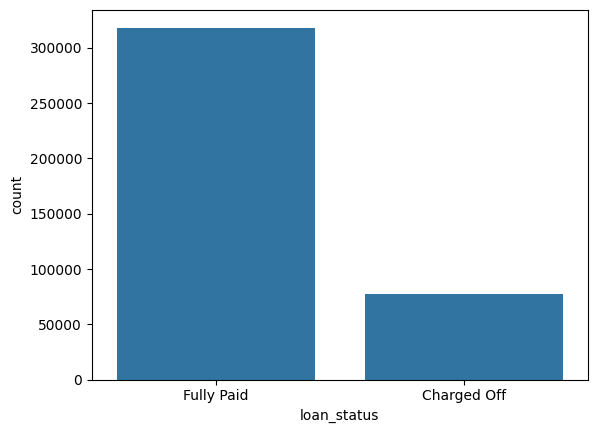

In [310]:
sns.countplot(x=df['loan_status'],data=df)

##create a histogram of the loan_amount column


<Axes: xlabel='loan_amnt', ylabel='Count'>

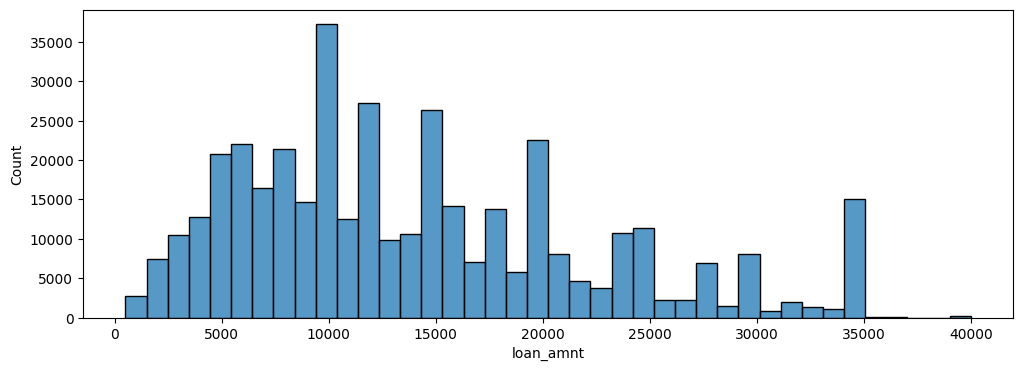

In [311]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'],kde=False,bins=40)

##Explore the correlation
between the continues feature varialbes.
Calculate the correlation btw continues numeric variables using .coor() method

In [312]:
df.select_dtypes(include=['float64', 'int64']).corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


Visualize this using a heatmap

<Axes: >

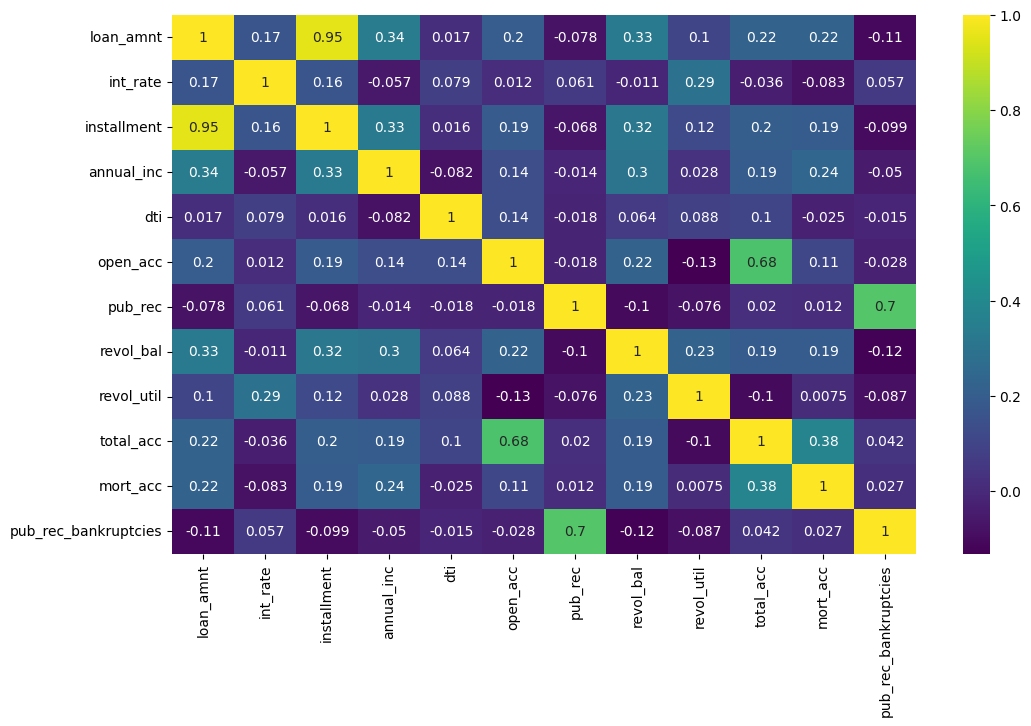

In [313]:
plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(),annot=True,cmap='viridis')

notice almost perfect correlation with "installment" feature.
explore the feature further.
print out their description and perform a scatterplot btw them.does the relation make sense .is there a duplicate information here

In [314]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [315]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

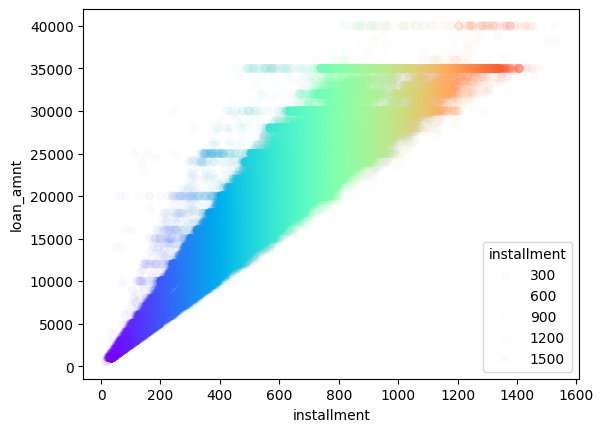

In [316]:
sns.scatterplot(x='installment',y='loan_amnt',hue="installment",data=df,edgecolor=None,alpha=0.02,palette='rainbow')

## Create a boxplot showing the relationship btw loan_status and the loan ammount

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

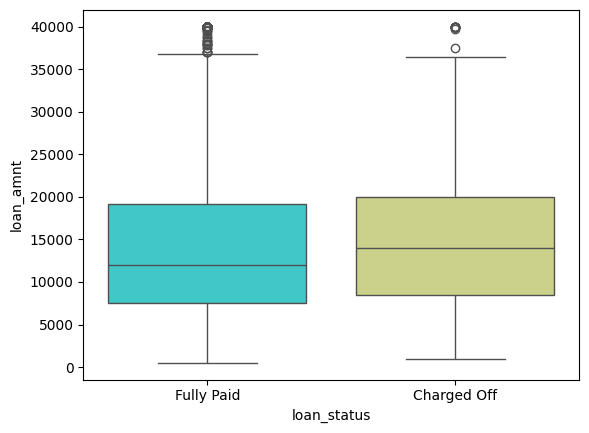

In [317]:
sns.boxplot(x='loan_status',y='loan_amnt',hue='loan_status',data=df,palette='rainbow')

##calculate the summary statistics for the loan amount, grouped by the loan_status

In [318]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Explore the Grade and SubGrade columns that LendindClub attributes to the loans .WHat are the Unique possible grades and subgrades

In [319]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [320]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [321]:
feat_info("sub_grade")

LC assigned loan subgrade


## Create a countplot per_grade.Set hue to loan_status label

<Axes: xlabel='grade', ylabel='count'>

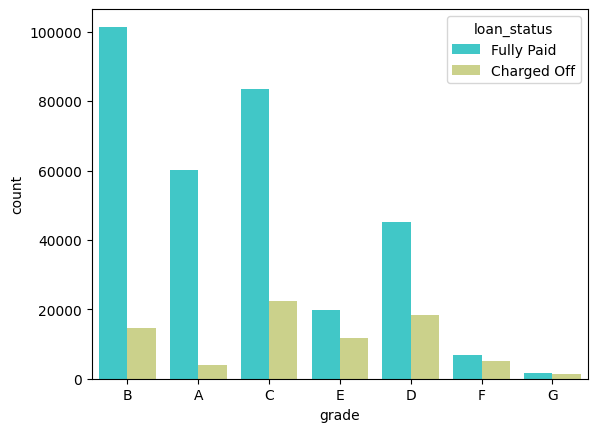

In [322]:
sns.countplot(x='grade',hue='loan_status',data=df,palette='rainbow')

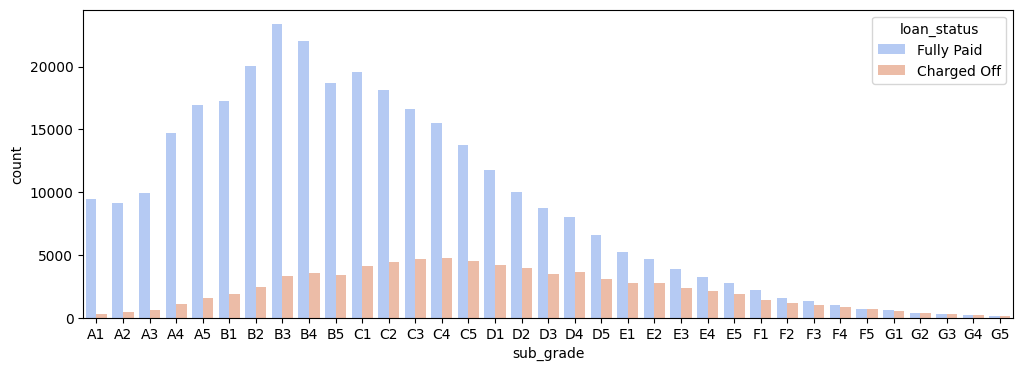

In [323]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',hue='loan_status',data=df,palette='coolwarm',order=subgrade_order)
plt.show()

it looks like F and G subgrades don't get paid back that often.Isolate those and recreate countplot just for those subgrades

<Axes: xlabel='sub_grade', ylabel='count'>

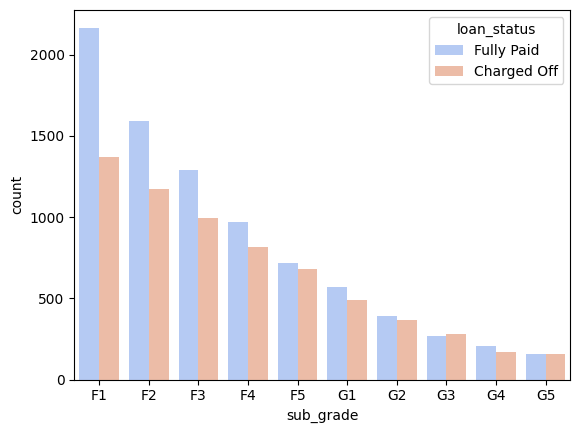

In [324]:
data= df[df['sub_grade'].isin(['F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])]
sorted_sub_grade= sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',hue='loan_status',data=data,palette='coolwarm',order=sorted_sub_grade)

In [325]:
f_and_g =df[(df['grade'] == 'G') | (df['grade'] == 'F')]

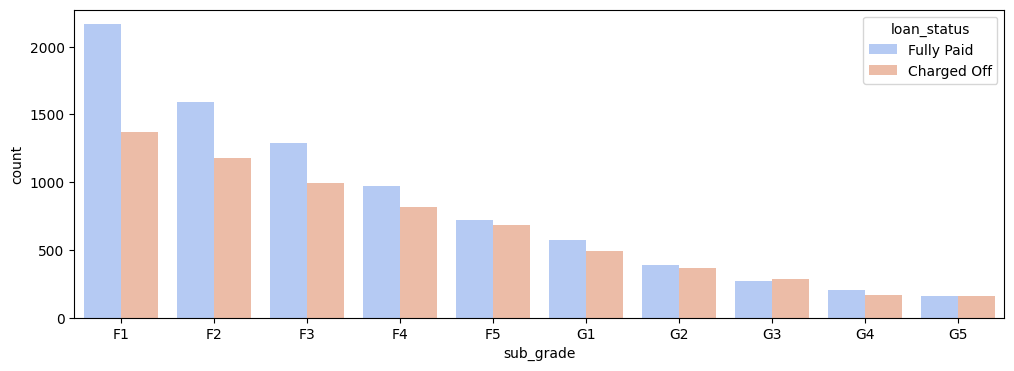

In [326]:
plt.figure(figsize=(12,4))
sub_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',hue='loan_status',data=f_and_g,palette='coolwarm',order=sub_order)
plt.show()

Create a new column caleed 'loan_repaid' which will contain a 1 if the loan_status was fully paid and 0 if it was charged off

In [327]:
df['loan_repaid'] = df['loan_status'].apply(lambda status: 1 if status == 'Fully Paid' else 0)

In [328]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [329]:
df.select_dtypes(include=['float64', 'int64']).corr()['loan_repaid'][:-1].sort_values(ascending=False)

,loan_repaid
mort_acc,0.073111
annual_inc,0.053432
total_acc,0.017893
revol_bal,0.010892
pub_rec_bankruptcies,-0.009383
pub_rec,-0.019933
open_acc,-0.028012
installment,-0.041082
loan_amnt,-0.059836
dti,-0.062413


<Axes: >

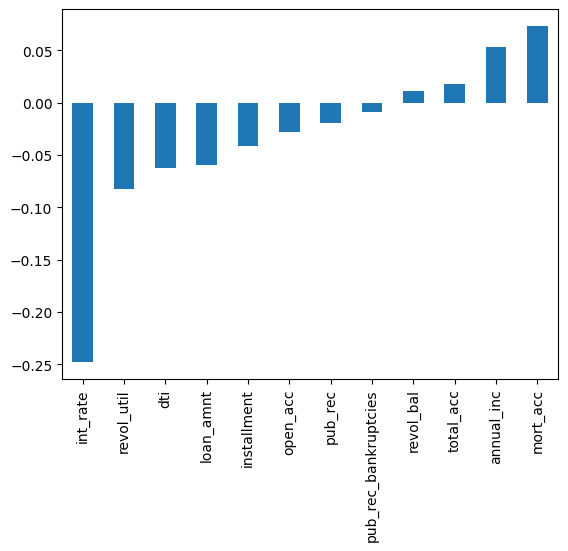

In [330]:
df.select_dtypes(include=['float64', 'int64']).corr()['loan_repaid'][:-1].sort_values(ascending=True).plot(kind='bar')

<Axes: >

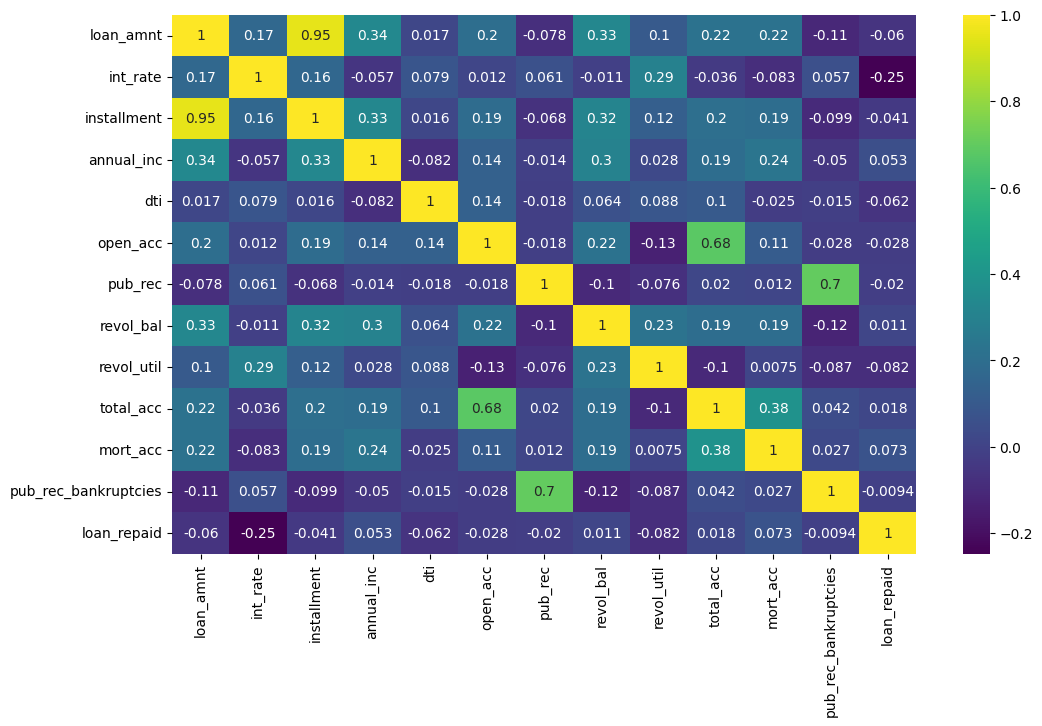

In [331]:

plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(),annot=True,cmap='viridis')

<Axes: >

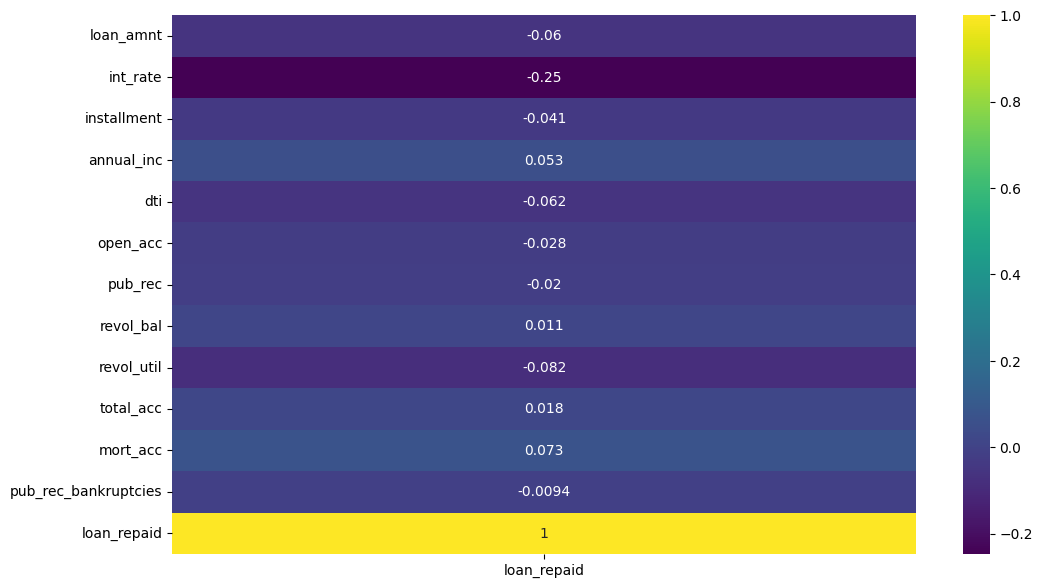

In [332]:

plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr()[['loan_repaid']],annot=True,cmap='viridis')

##Missing Data

In [333]:
len(df)

396030

In [334]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


Convert the Series in terms of percentage of the toal dataframe

In [335]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

,0
mort_acc,9.543469
emp_title,5.789208
emp_length,4.621115
title,0.443401
pub_rec_bankruptcies,0.135091
revol_util,0.069692
sub_grade,0.000000
grade,0.000000
installment,0.000000
int_rate,0.000000


examine the missing data columns to evaluate the importance

In [336]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [337]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [338]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

how many unique employment job titles are there

In [339]:
df['emp_title'].nunique()

173105

In [340]:
df = df.drop('emp_title',axis=1)

In [341]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [342]:
emp_length_order =['< 1 year',
                   '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years',

 ]

In [343]:
emp_length_order

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

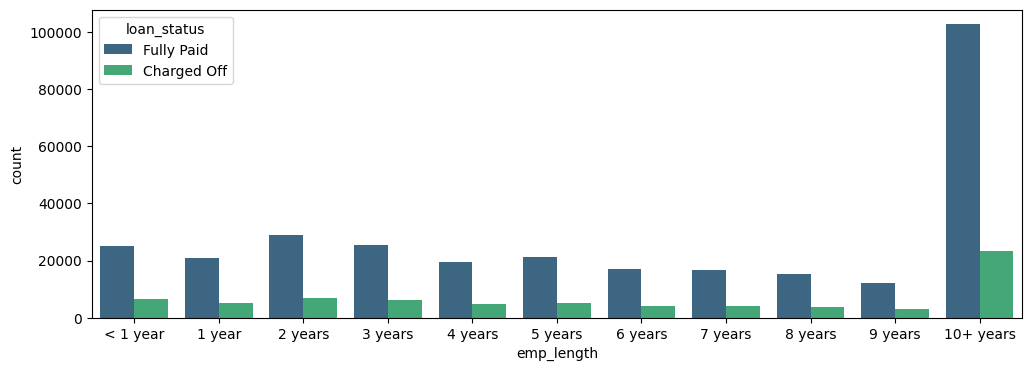

In [344]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',hue='loan_status',data=df,palette='viridis',order=emp_length_order)

In [345]:
emp_co=df[(df['loan_status'] )== 'Charged Off' ].groupby('emp_length').count()['loan_status']

In [346]:
emp_fp=df[(df['loan_status'] )== 'Fully Paid' ].groupby('emp_length').count()['loan_status']

In [347]:
emp_co/emp_fp   #ratio

,loan_status
emp_length,
1 year,0.248649
10+ years,0.225770
2 years,0.239560
3 years,0.242593
4 years,0.238213
5 years,0.237911
6 years,0.233341
7 years,0.241887
8 years,0.249625


In [348]:
emp_len =emp_co/(emp_co +emp_fp )  #precent

<Axes: xlabel='emp_length'>

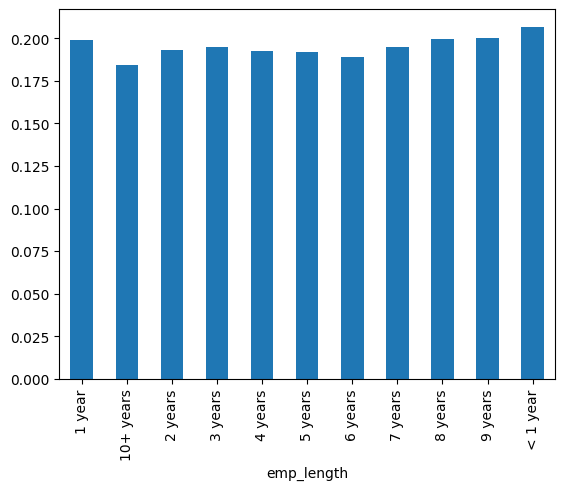

In [349]:
emp_len.plot(kind='bar')

In [350]:
df = df.drop('emp_length',axis=1)

In [351]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [352]:
df['purpose']

,purpose
0,vacation
1,debt_consolidation
2,credit_card
3,credit_card
4,credit_card
...,...
396025,debt_consolidation
396026,debt_consolidation
396027,debt_consolidation
396028,debt_consolidation


In [353]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [354]:
df['title'].head()

,title
0,Vacation
1,Debt consolidation
2,Credit card refinancing
3,Credit card refinancing
4,Credit Card Refinance


In [355]:
feat_info('title')

The loan title provided by the borrower


In [356]:
df = df.drop('title',axis=1)

In [357]:
feat_info('mort_acc')

Number of mortgage accounts.


In [358]:
#Find out wat the mort_acc feature represnts
df['mort_acc'].value_counts()

,count
mort_acc,
0.0,139777
1.0,60416
2.0,49948
3.0,38049
4.0,27887
5.0,18194
6.0,11069
7.0,6052
8.0,3121


In [359]:
df.select_dtypes(include=['int64','float64']).corr()['mort_acc'].sort_values()[:-1]

,mort_acc
int_rate,-0.082583
dti,-0.025439
revol_util,0.007514
pub_rec,0.011552
pub_rec_bankruptcies,0.027239
loan_repaid,0.073111
open_acc,0.109205
installment,0.193694
revol_bal,0.194925
loan_amnt,0.222315


In [360]:
df.groupby('total_acc')['mort_acc'].mean()

,mort_acc
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


In [361]:
total_acc_avg=df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

In [362]:
def fill_mort_acc(mort_acc,total_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc


In [363]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [364]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [365]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [366]:
df = df.dropna()

In [367]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


Categorical Data processing

In [368]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [369]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [370]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [371]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [372]:
df['term'].dtype

dtype('int64')

In [373]:
#grade feature

df =df.drop('grade',axis=1)

In [374]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [375]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df.drop('sub_grade',axis=1,inplace=True)

df = pd.concat([df,dummies],axis=1)

In [376]:
dummies = pd.get_dummies(df[[ 'verification_status',
                        'purpose',
                        'initial_list_status',
                        'application_type',
                            ]],
                         drop_first=True)


df = pd.concat([df.drop(['verification_status',
                        'purpose',
                        'initial_list_status',
                        'application_type',]
                             ,axis=1),dummies],axis=1)

In [378]:
df['home_ownership']

,home_ownership
0,RENT
1,MORTGAGE
2,RENT
3,RENT
4,MORTGAGE
...,...
396025,RENT
396026,MORTGAGE
396027,RENT
396028,MORTGAGE


In [379]:


df['home_ownership'] = df['home_ownership'].replace(
    ['NONE', 'ANY'],
    'OTHER'
)


In [381]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [382]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [384]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

do some feature engineering with address

In [386]:
df['zip_code']=df['address'].apply(lambda address:address.split()[-1])

In [387]:
df['zip_code'].value_counts()

,count
zip_code,
70466,56880
22690,56413
30723,56402
48052,55811
00813,45725
29597,45393
05113,45300
11650,11210
93700,11126


In [388]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [391]:
df =df.drop('address',axis=1)

In [401]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [393]:
feat_info('issue_d')

The month which the loan was funded


In [394]:
df =df.drop('issue_d',axis=1)

In [396]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [399]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [400]:
df['earliest_cr_line']

,earliest_cr_line
0,1990
1,2004
2,2007
3,2006
4,1999
...,...
396025,2004
396026,2006
396027,1997
396028,1990


In [405]:
df['loan_repaid'].unique()

array([1, 0])

In [407]:
df =df.drop('loan_status',axis=1)

In [408]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'OTHER', 'OWN',
       'RENT', '05113', '11650', '22690

Train Test Split then normalize the data


In [410]:
from sklearn.model_selection import train_test_split

In [409]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [411]:
#df =df.sample(frac=0.1,random_state=101)
# print(len(df))

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [413]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

In [414]:
scaler = MinMaxScaler()




In [415]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Create the model

In [416]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [417]:
X_train.shape

(316175, 78)

In [418]:
model =Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [419]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [420]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3564 - val_loss: 0.2648
Epoch 2/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2687 - val_loss: 0.2634
Epoch 3/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2636 - val_loss: 0.2625
Epoch 4/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2620 - val_loss: 0.2624
Epoch 5/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2624 - val_loss: 0.2621
Epoch 6/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2610 - val_loss: 0.2617
Epoch 7/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2608 - val_loss: 0.2620
Epoch 8/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2603 - val_loss: 0.2618
Epoch 9/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2590 - val_loss: 0.2614
Epoch 10/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2585 - val_loss: 0.2617
Epoch 11/600
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2601 - val_loss: 0.2619
Epoch 12/600
1236/

In [421]:
from tensorflow.keras.models import load_model

In [422]:
#model.save("my_fav_model.keras")

In [ ]:
# loaded_model = load_model("my_fav_model.keras")

Evaluate model performance

In [423]:
losses =pd.DataFrame(model.history.history)

<Axes: >

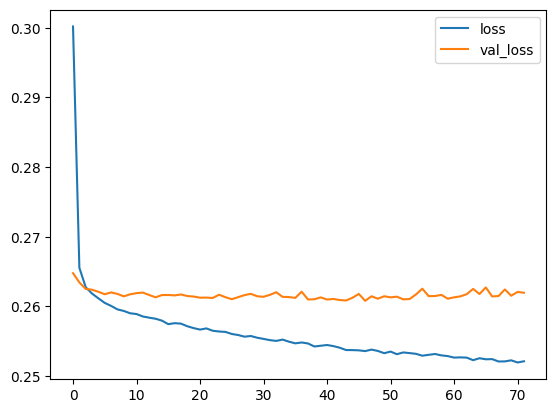

In [424]:
losses.plot()

In [425]:
from sklearn.metrics import classification_report,confusion_matrix

In [431]:
y_pred_probs = model.predict(X_test)
predictions = (y_pred_probs > 0.5).astype(int)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [432]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [433]:
print(confusion_matrix(y_test,predictions))

[[ 6974  8684]
 [  231 63155]]


<Axes: >

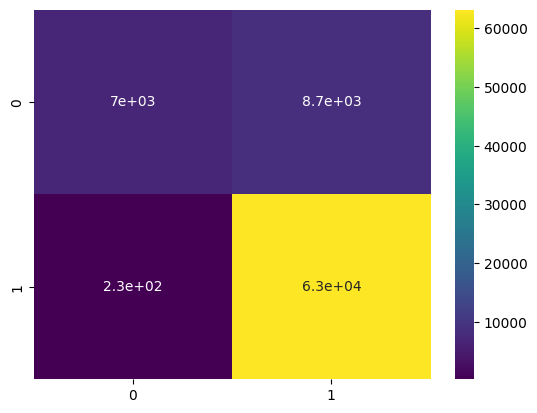

In [434]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='viridis')

In [435]:
df['loan_repaid'].value_counts()

,count
loan_repaid,
1,317696
0,77523


In [436]:
317696 / len(df)

0.8038479931379817

Given the customer below would you offer them a loan

In [453]:
import random
random.seed(101)
random_ind = random.randint(5,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

,305328
loan_amnt,15000.0
term,60
int_rate,13.33
installment,343.84
annual_inc,75000.0
...,...
30723,False
48052,False
70466,False
86630,False


In [454]:
new_customer=scaler.transform(new_customer.values.reshape(1,78))

In [455]:
pred =model.predict(new_customer)
print(pred)

if pred > 0.5:
  print("Loan Approved")
else:
  print("Loan Rejected")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[4.7162883e-29]]
Loan Rejected


In [456]:
df.iloc[random_ind]['loan_repaid']

np.int64(0)